In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns',None)
fraud=pd.read_csv('insurance_fraud_claims.csv')
fraud.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
fraud.shape

(1000, 40)

In [4]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
fraud.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [6]:
fraud=fraud.drop(['_c39'],axis=1)

In [7]:
fraud.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [8]:
colum_name =[]
unique_value=[]
# Iterate through the columns
for col in fraud:
    # If 2 or fewer unique categories
    colum_name.append(str(col)) 
    unique_value.append(fraud[col].nunique())
table= pd.DataFrame()
table['Col_name'] = colum_name
table['Value']= unique_value
            
table=table.sort_values('Value',ascending=False)
table

,Col_name,Value
2,policy_number,1000
24,incident_location,1000
9,insured_zip,995
7,policy_annual_premium,991
3,policy_bind_date,951
31,total_claim_amount,763
34,vehicle_claim,726
32,injury_claim,638
33,property_claim,626
0,months_as_customer,391


In [9]:
cat_col=[]
num_col=[]
for i in fraud.dtypes.index:
    if fraud.dtypes[i]=='object':
        cat_col.append(i)
    else:
        num_col.append(i)
print('categorical columns:\n\t\t',cat_col)
print('\n\nnumeric columns:\n\t\t',num_col)

categorical columns:
		 ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


numeric columns:
		 ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']


In [10]:
fraud['policy_state'].value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

In [11]:
fraud['policy_csl'].value_counts()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

In [12]:
fraud['policy_deductable'].value_counts()

1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64

In [13]:
fraud['insured_education_level'].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

In [14]:
fraud['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

In [15]:
fraud['insured_relationship'].value_counts()

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

In [16]:
fraud['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [17]:
fraud['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [18]:
fraud['number_of_vehicles_involved'].value_counts()

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64

In [19]:
fraud['incident_severity'].value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

In [20]:
fraud['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [21]:
fraud['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [22]:
fraud['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [23]:
fraud['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [24]:
fraud.property_damage = fraud.property_damage.replace({'?':'UNKNOWN'})
fraud.police_report_available = fraud.police_report_available.replace({'?':'UNKNOWN'})
fraud.collision_type = fraud.collision_type.replace({'?':'UNKNOWN'})

In [25]:
# use to help in data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

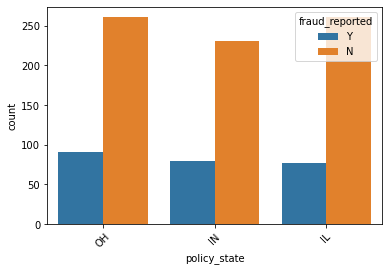

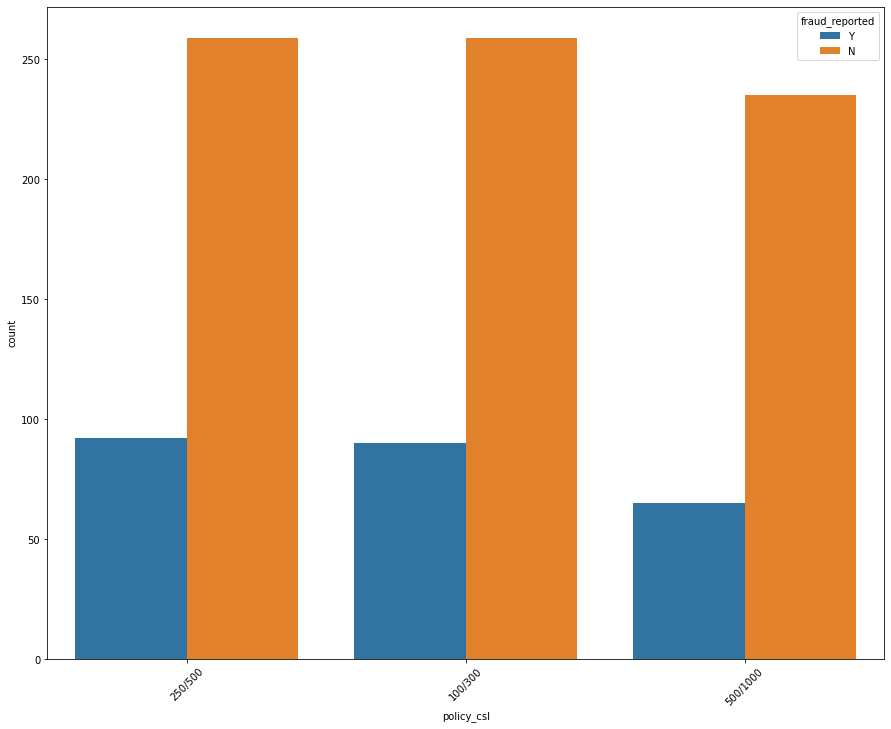

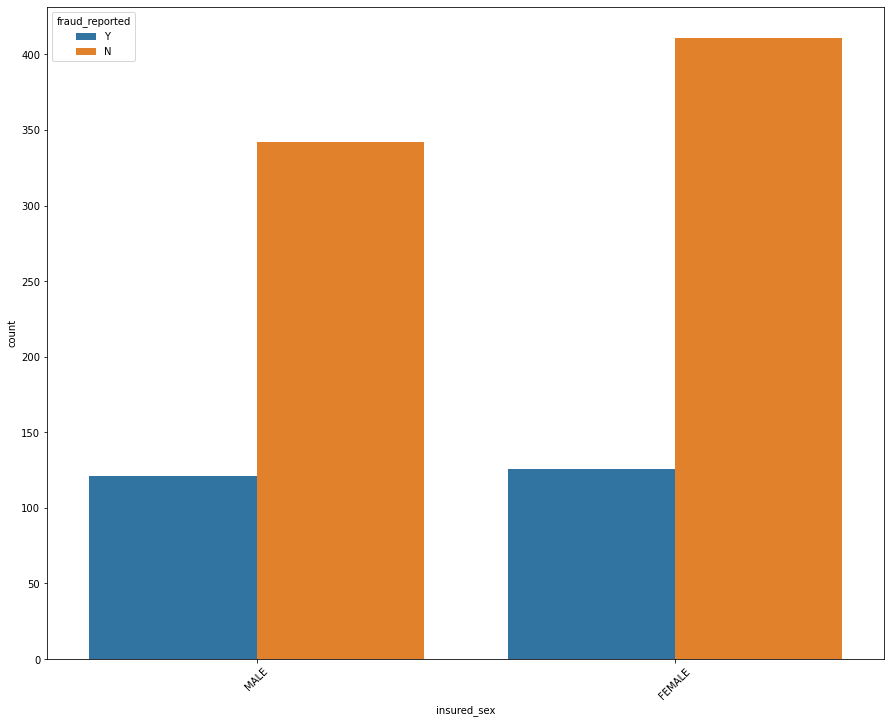

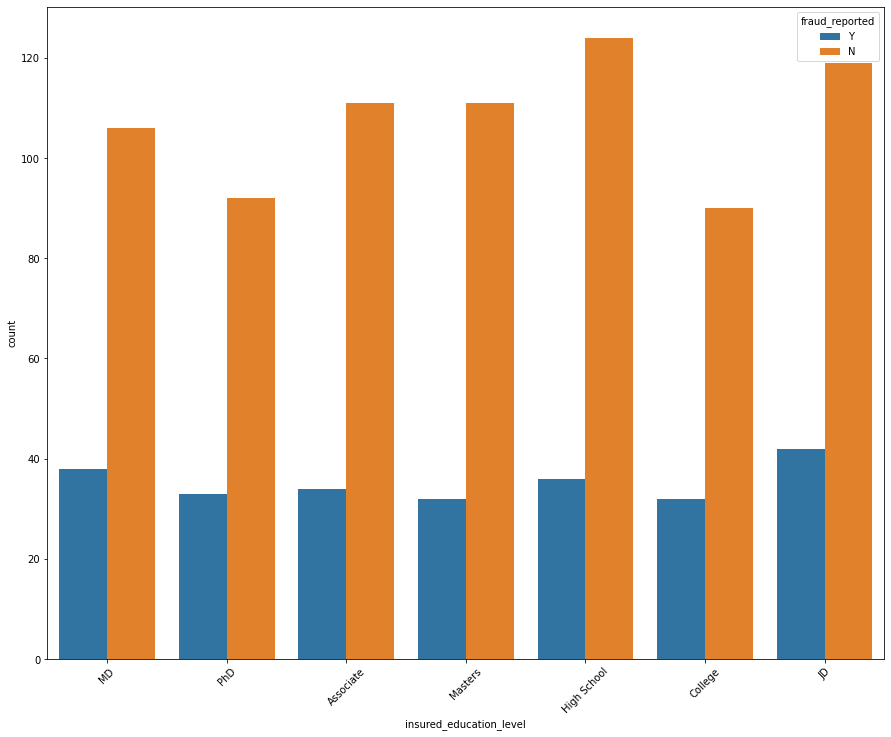

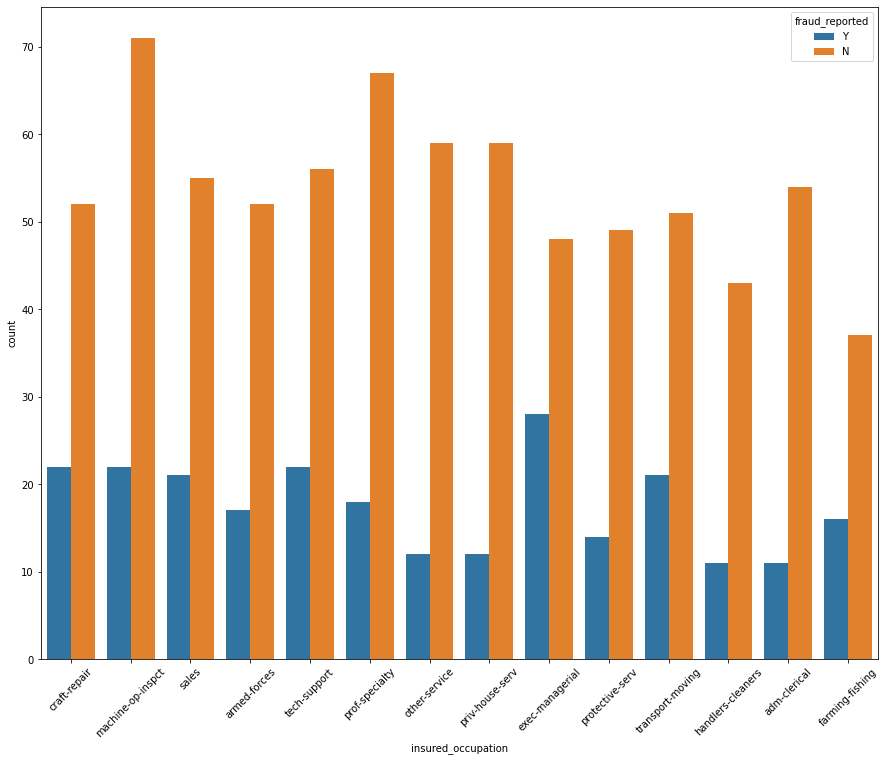

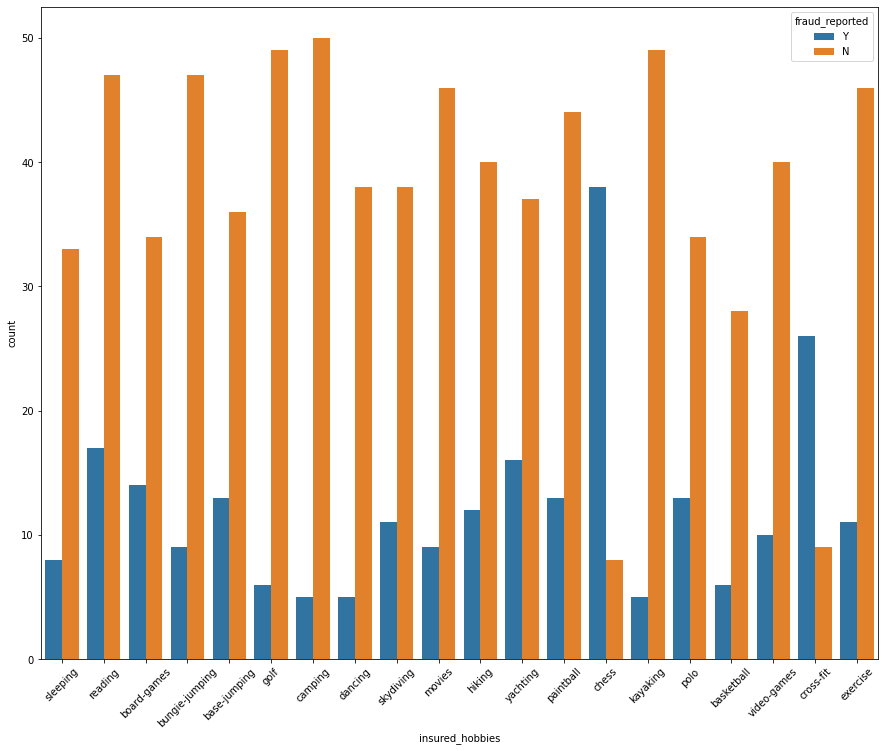

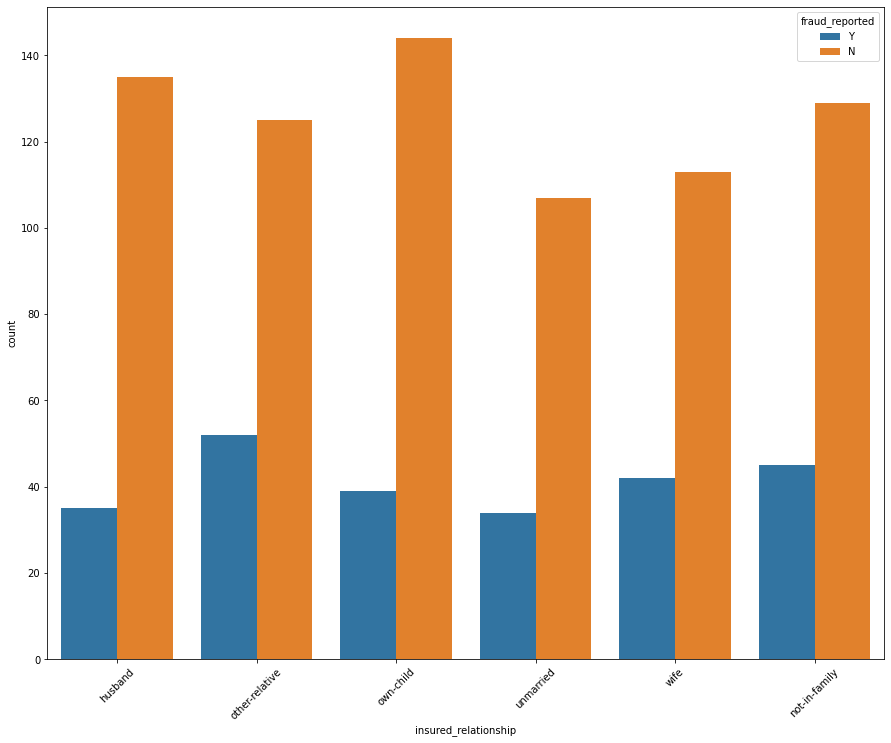

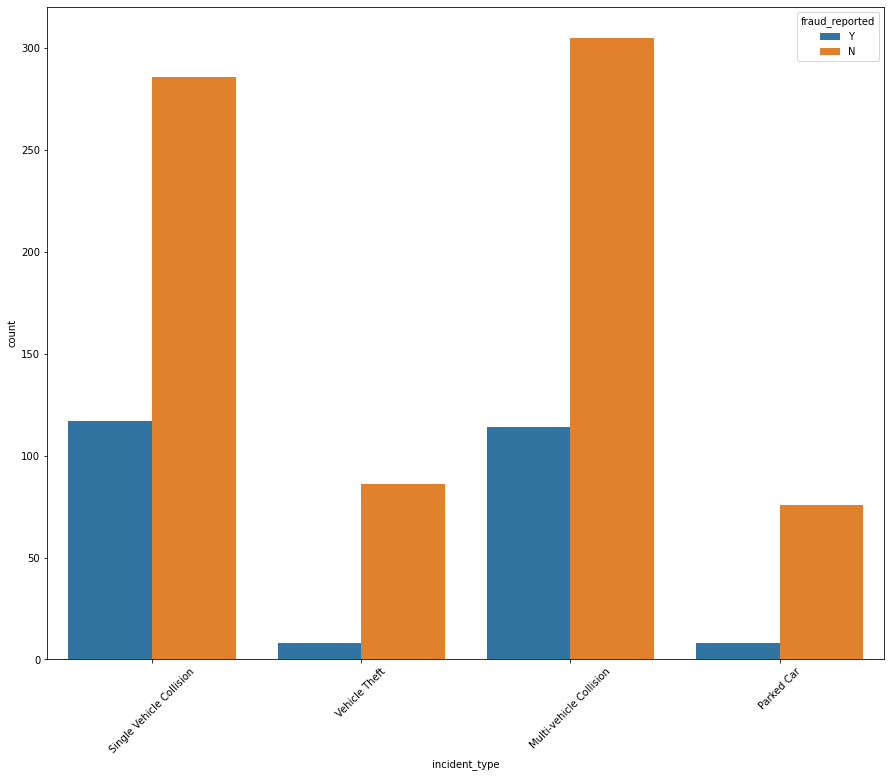

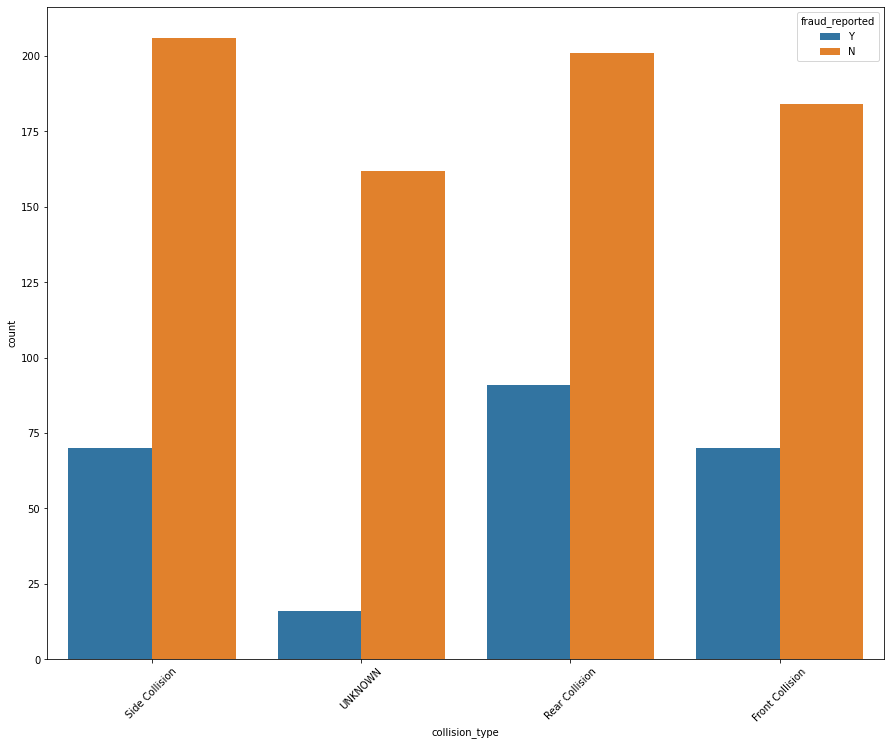

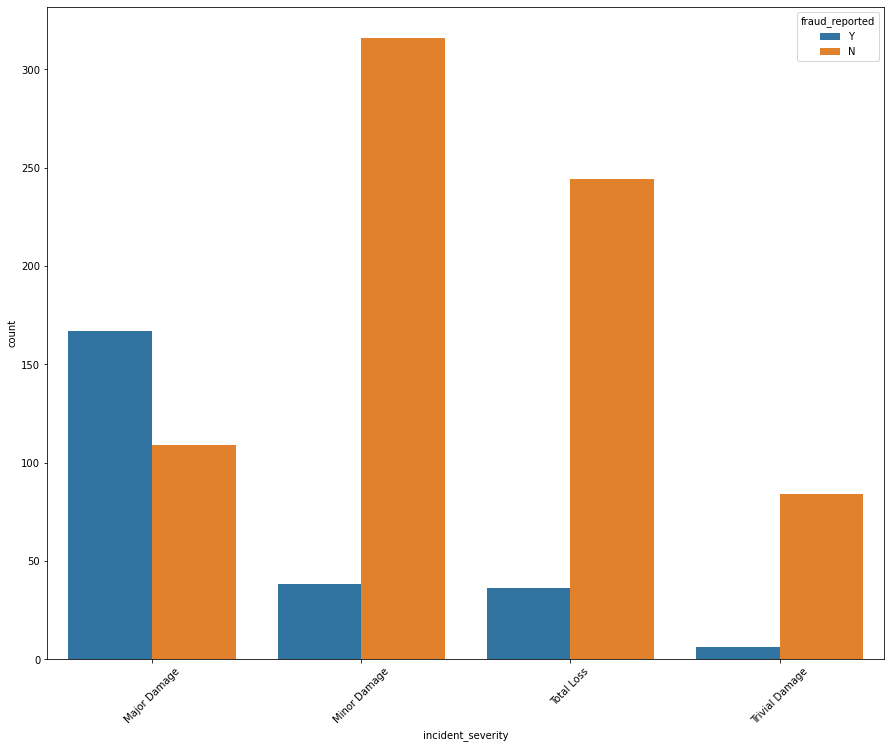

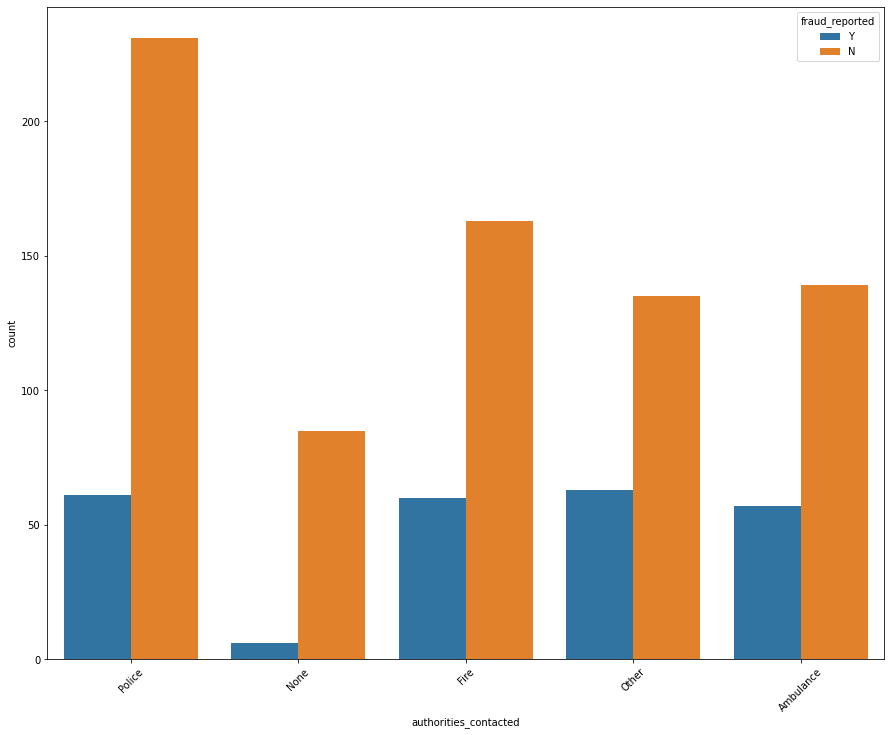

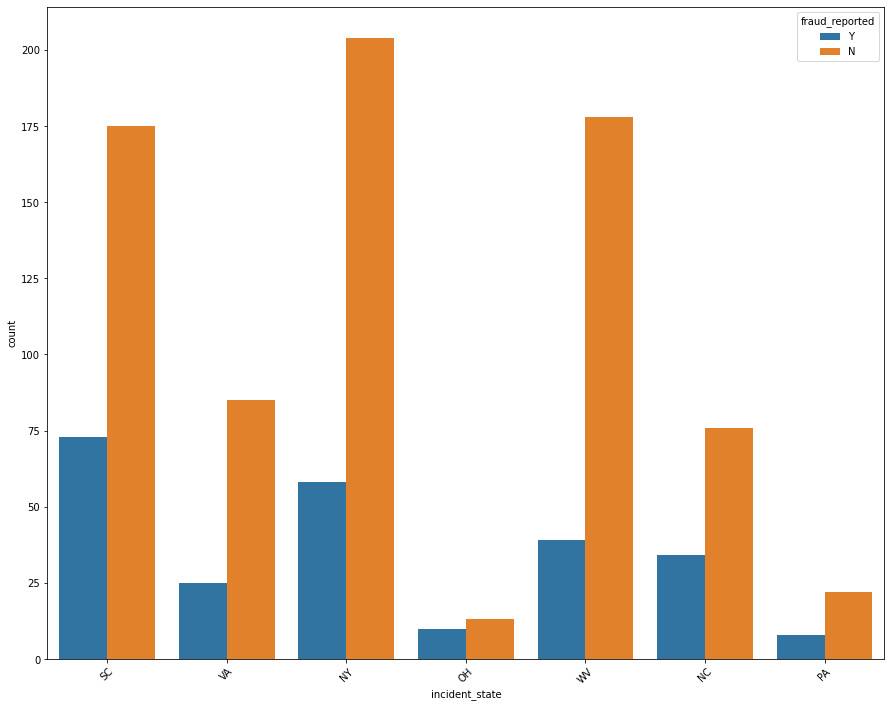

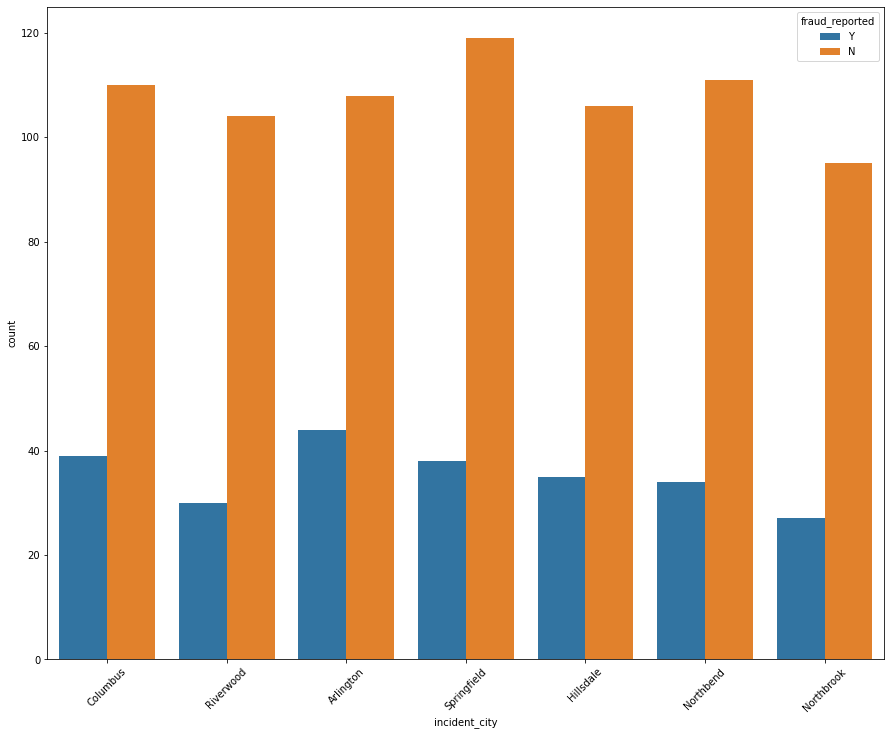

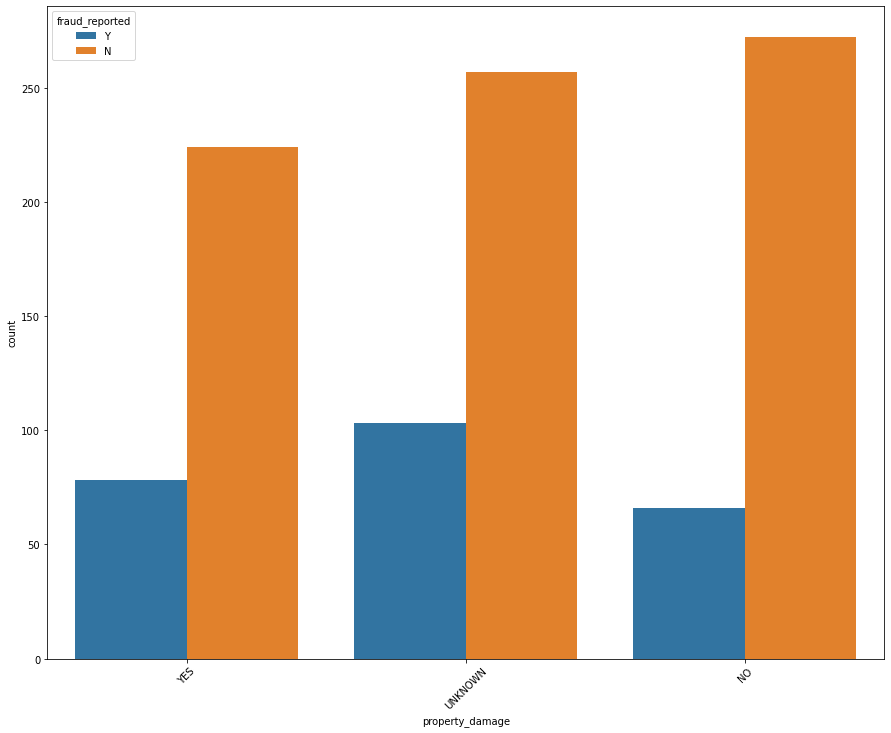

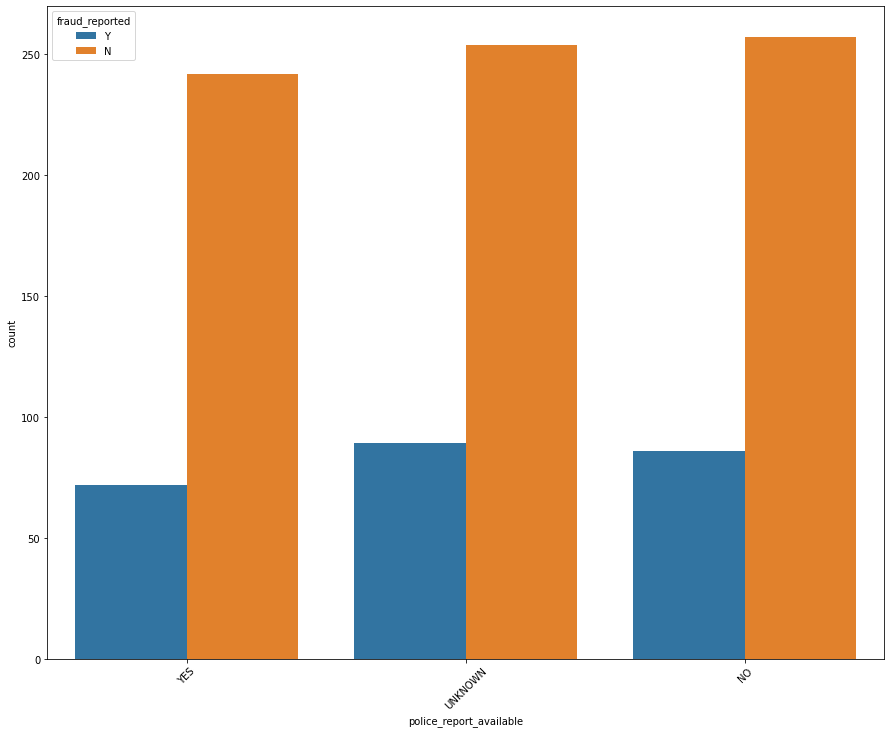

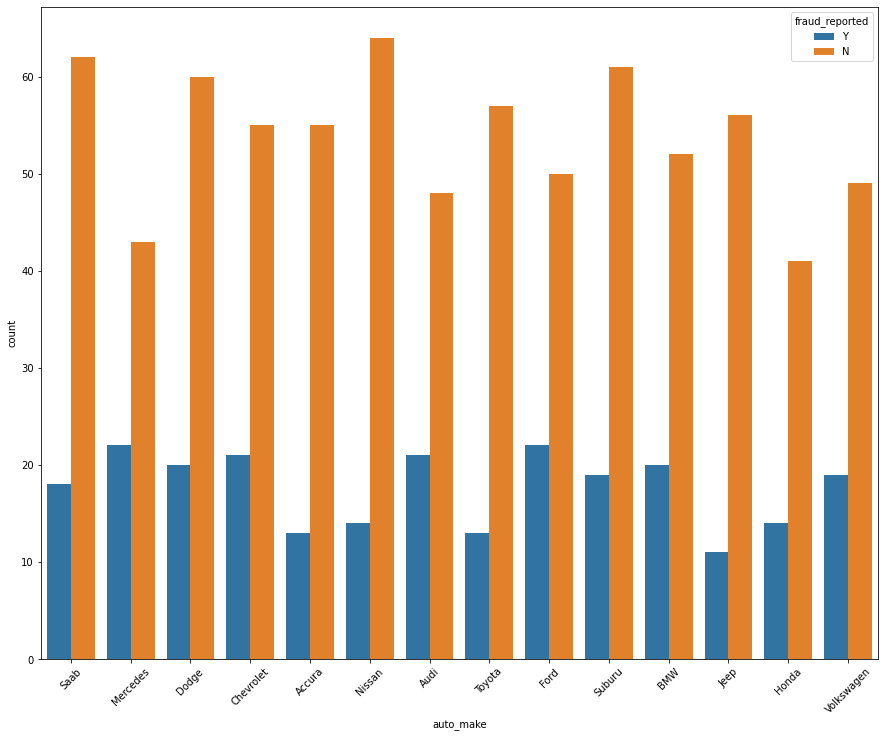

<Figure size 1080x864 with 0 Axes>

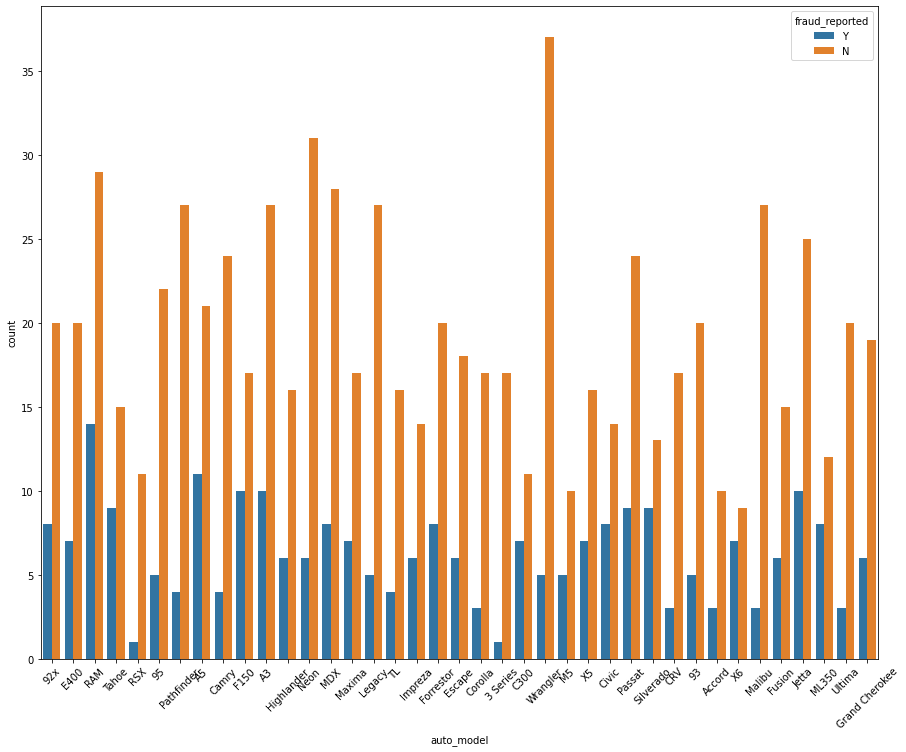

In [26]:
for i, j in enumerate(fraud.drop(columns=['incident_date','incident_location','policy_bind_date','fraud_reported','months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year'])):
    plt.figure(figsize=(15,12))
    plt.figure(i)
    sns.countplot(data=fraud, x=j, hue='fraud_reported')
    plt.xticks(rotation=45)
    

In [27]:
fraud.insured_sex = fraud.insured_sex.replace({'MALE':1,'FEMALE':0})
fraud.incident_severity = fraud.incident_severity.replace({'Minor Damage': 1, 'Major Damage': 2, 'Total Loss': 3, 'Trivial Damage': 4})

In [28]:
fraud.fraud_reported = fraud.fraud_reported.replace({'Y':1, 'N':0})

In [29]:
fraud=fraud.drop(['months_as_customer','injury_claim','property_claim','vehicle_claim','policy_number','incident_location','insured_zip','policy_bind_date','insured_hobbies','auto_make','auto_model','incident_state','incident_city','incident_location','incident_date','auto_year','policy_state','insured_education_level','insured_occupation','policy_csl'],axis=1)

In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


fraud.insured_relationship=le.fit_transform(fraud.insured_relationship)
fraud.incident_type=le.fit_transform(fraud.incident_type)
fraud.collision_type=le.fit_transform(fraud.collision_type)
fraud.authorities_contacted=le.fit_transform(fraud.authorities_contacted)
fraud.property_damage=le.fit_transform(fraud.property_damage)
fraud.police_report_available=le.fit_transform(fraud.police_report_available)

In [31]:
fraud

,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,fraud_reported
0,48,1000,1406.91,0,1,0,53300,0,2,2,2,4,5,1,2,1,2,2,71610,1
1,42,2000,1197.22,5000000,1,2,0,0,3,3,1,4,8,1,1,0,0,1,5070,1
2,29,2000,1413.14,5000000,0,3,35100,0,0,1,1,4,7,3,0,2,3,0,34650,0
3,41,2000,1415.74,6000000,0,4,48900,-62400,2,0,2,4,5,1,1,1,2,0,63400,1
4,44,1000,1583.91,6000000,1,4,66000,-46000,3,3,1,2,20,1,0,0,1,0,6500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,38,1000,1310.80,0,0,4,0,0,2,0,1,1,20,1,2,0,1,1,87200,0
996,41,1000,1436.79,0,0,5,70900,0,2,1,2,1,23,1,2,2,3,1,108480,0
997,34,500,1383.49,3000000,0,2,35100,0,0,2,1,4,4,3,1,2,3,2,67500,0
998,62,2000,1356.92,5000000,1,5,0,0,2,1,2,3,2,1,1,0,1,2,46980,0


In [32]:
fraud.columns

Index(['age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'fraud_reported'],
      dtype='object')

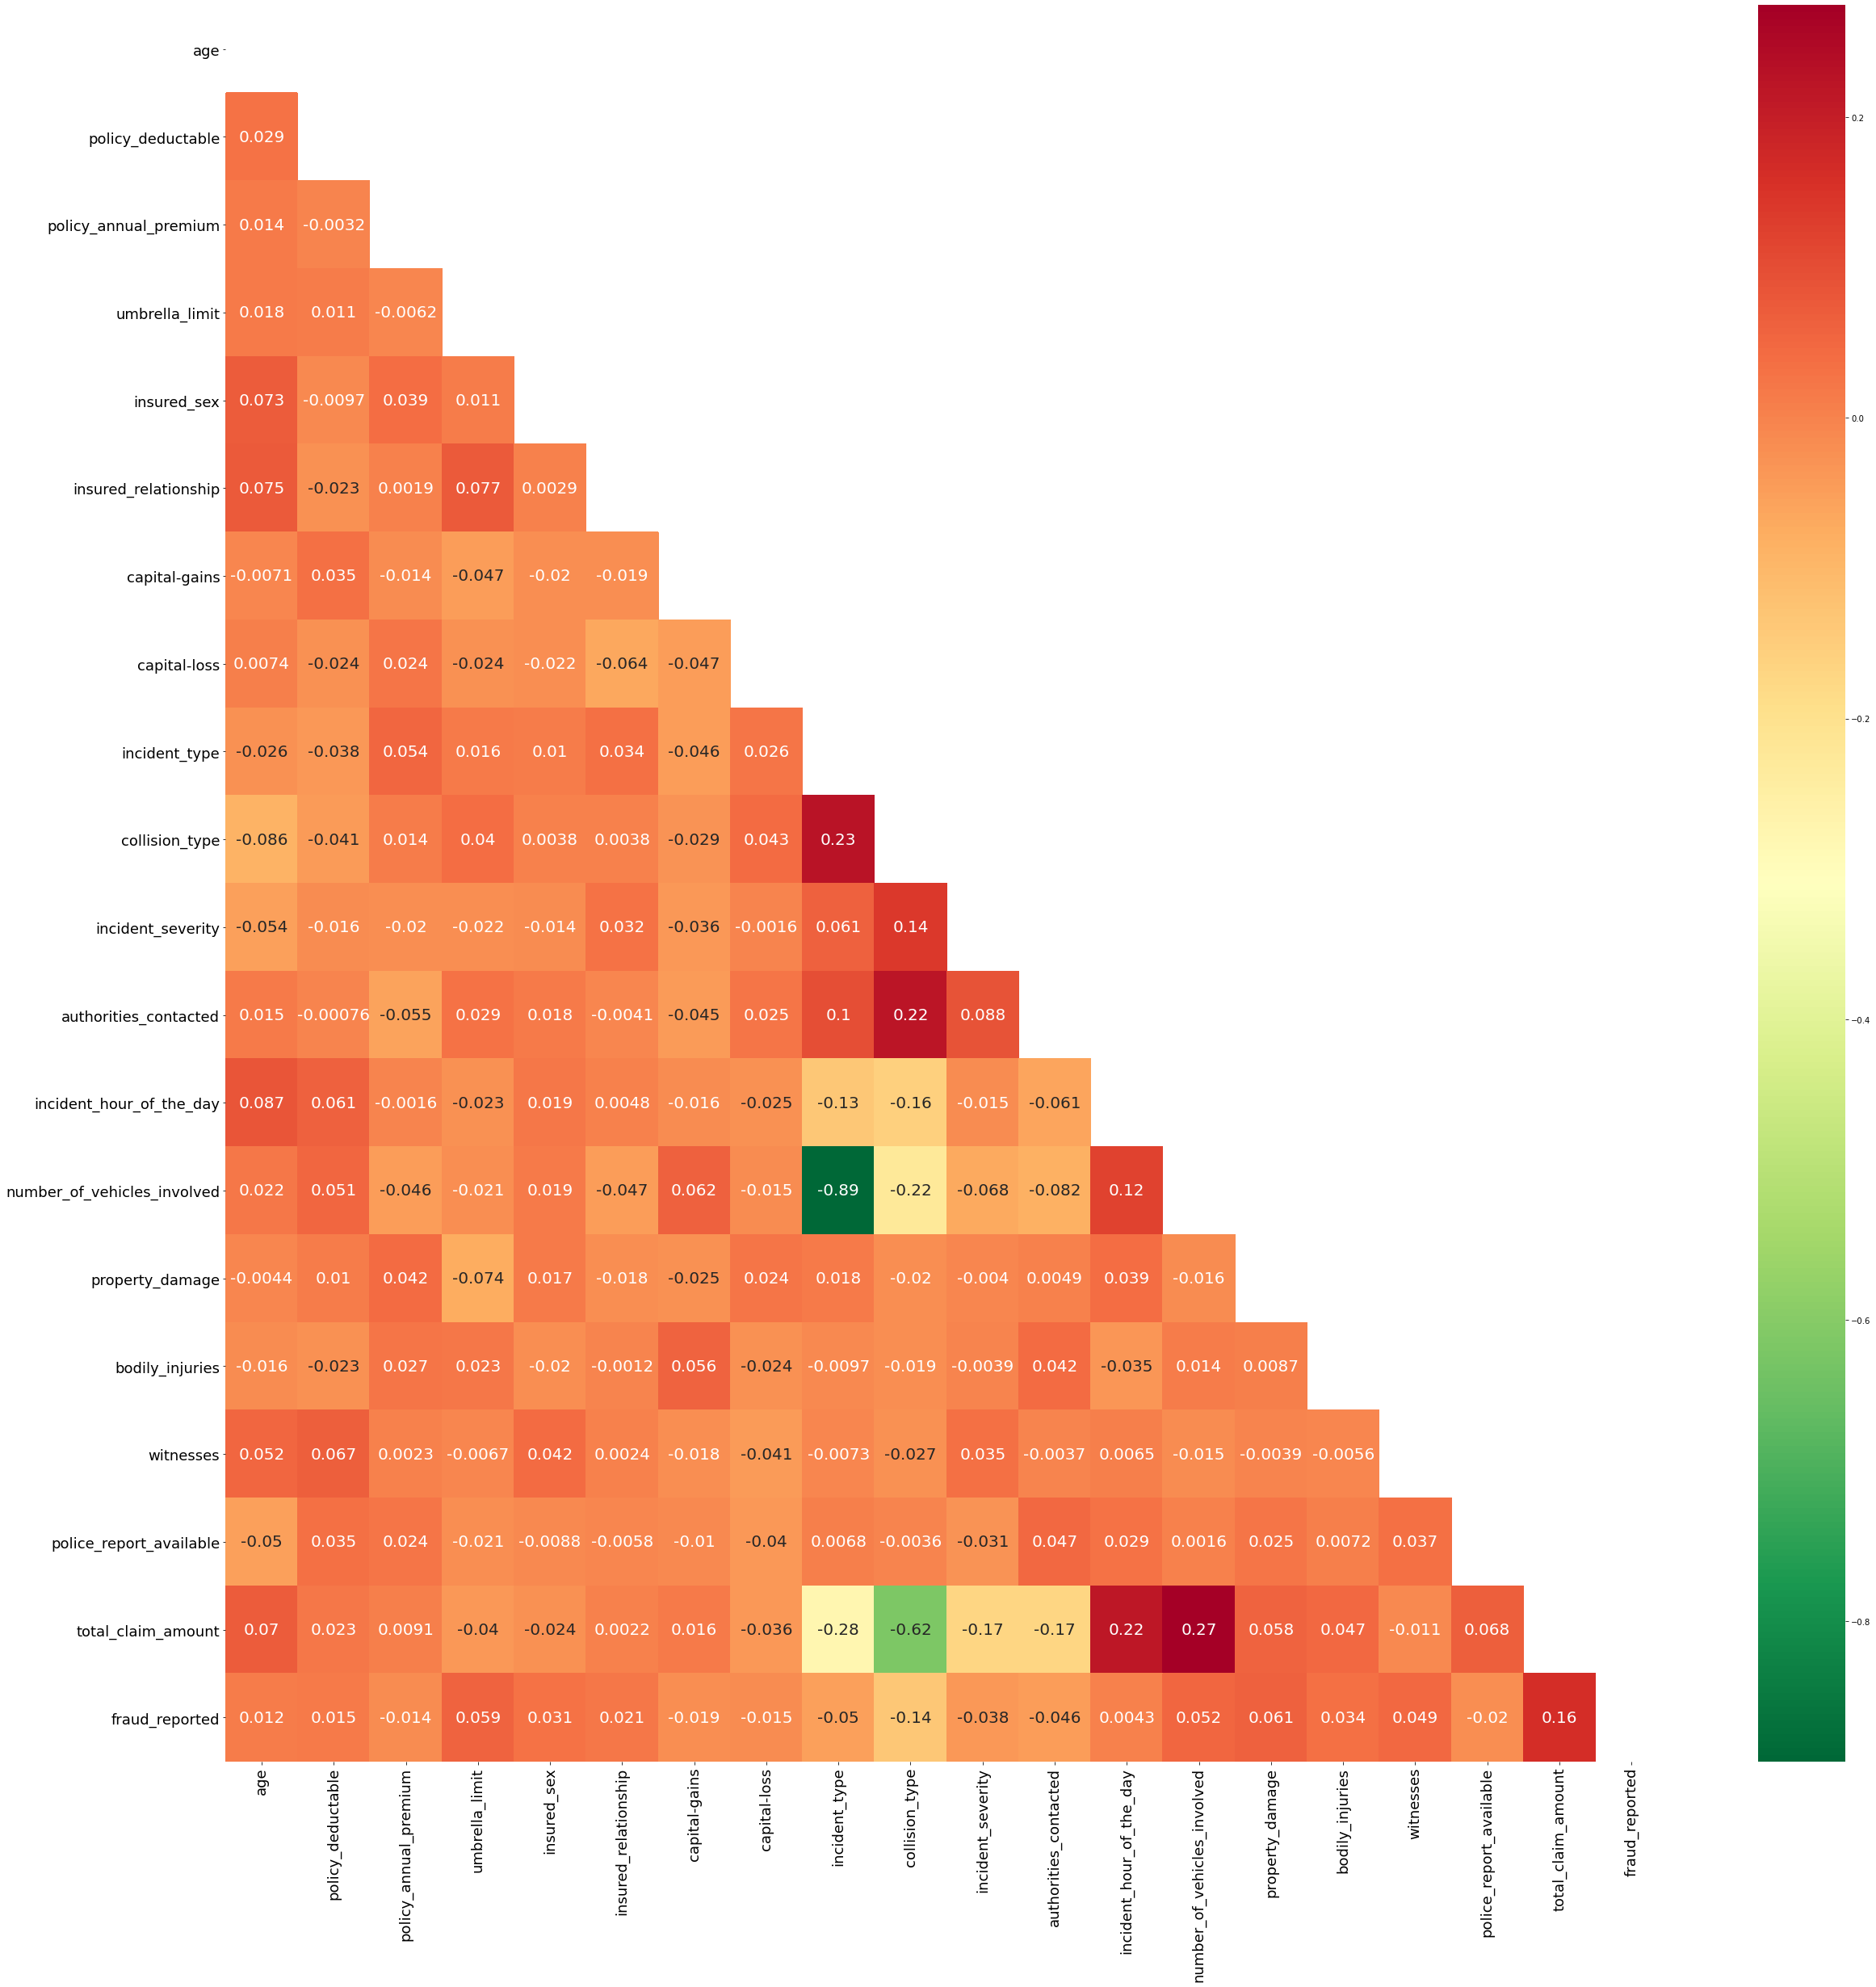

In [33]:
plt.figure(figsize=(40,40))
mask = np.triu(np.ones_like(fraud.corr()))
res = sns.heatmap(fraud.corr(), cmap='RdYlGn_r', annot=True,annot_kws={"size":20}, mask=mask)
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 18)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 18)


plt.show()

In [34]:
x=fraud.drop('fraud_reported',axis=1)
y=fraud['fraud_reported']

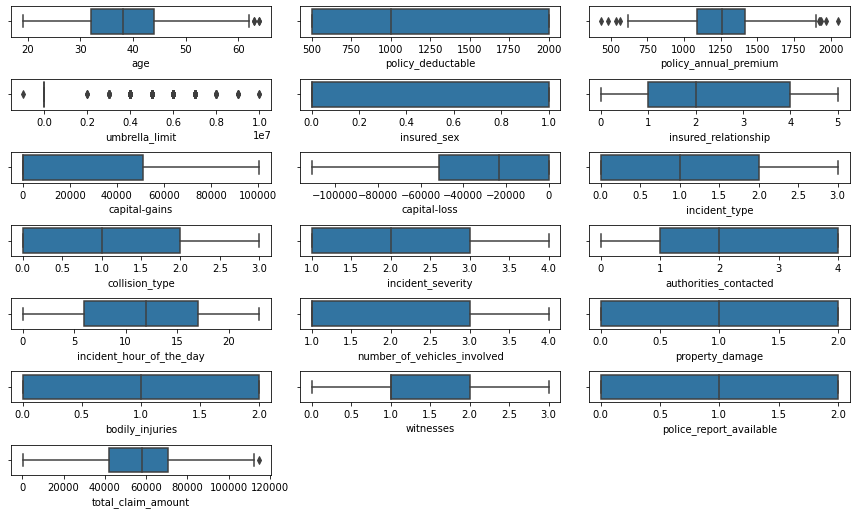

In [35]:
X_val=x.columns.values
plt.figure(figsize=(12,20))
for i in range(len(X_val)):
    plt.subplot(20,3,i+1)
    sns.boxplot(fraud[X_val[i]])
    plt.tight_layout()

In [36]:
for col in x.columns:
    percentile=x[col].quantile([0.01,0.98]).values
    x[col][x[col]<=percentile[0]]=percentile[0]
    x[col][x[col]>=percentile[1]]=percentile[1]

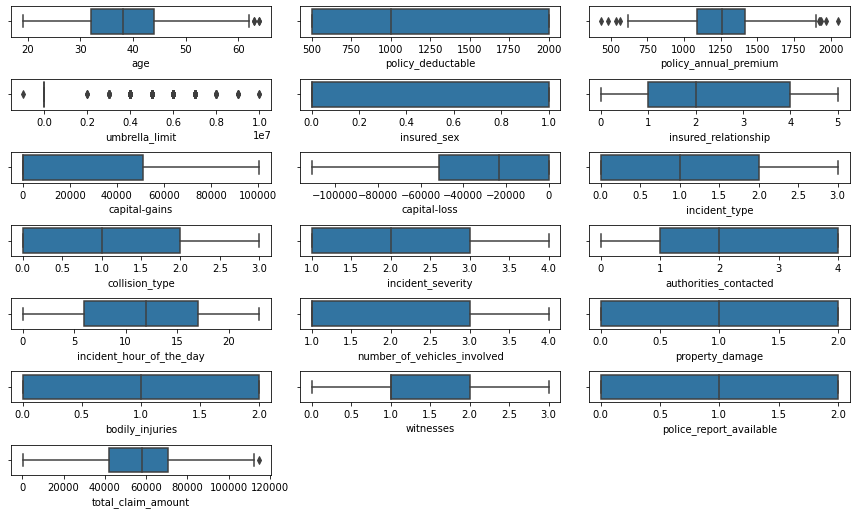

In [37]:
X_val=x.columns.values
plt.figure(figsize=(12,20))
for i in range(len(X_val)):
    plt.subplot(20,3,i+1)
    sns.boxplot(fraud[X_val[i]])
    plt.tight_layout()

In [38]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_over,y_over=sm.fit_resample(x,y)
y_over.value_counts()

0    753
1    753
Name: fraud_reported, dtype: int64

In [39]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_over=scaler.fit_transform(x_over)

In [40]:
x_over

array([[ 1.05203131, -0.22479822,  0.6852207 , ...,  0.59201306,
         1.4771193 ,  0.67827048],
       [ 0.35571173,  1.52216692, -0.25029154, ..., -1.31713398,
         0.20304045, -2.08395105],
       [-1.1529807 ,  1.52216692,  0.71301526, ...,  1.54658658,
        -1.07103839, -0.85602029],
       ...,
       [-0.22455459,  1.42433687,  0.41176349, ..., -1.31713398,
        -1.07103839,  0.03460665],
       [ 0.35571173,  1.52216692,  0.60896451, ..., -0.36256046,
        -1.07103839,  0.30652927],
       [ 1.63229763,  0.76747798, -0.18498916, ..., -1.31713398,
        -1.07103839,  0.29325575]])

In [41]:
from sklearn.naive_bayes import  GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,plot_roc_curve
from sklearn.model_selection import train_test_split, cross_val_score

In [42]:
maxx=0
model=LogisticRegression()
for i in range(1,201):
    x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.25,random_state=i)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxx:
        maxx=accu
        random_state_=i
print('\nmax random state:',random_state_)


max random state: 140


In [43]:
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=.25,random_state=random_state_)

In [44]:
# LogisticRegression model  
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
scr_=cross_val_score(lr,x_over,y_over,cv=10)
print('--------------------------LogisticRegression------------------')
print(f'\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%\n')
print(f'cross validation score:{scr_.mean()*100:.2f}%\n')
print(f'auc roc score:{roc_auc_score(y_test,pred)*100:.2f}%\n')
print(f'\nclassification report:\n\n{classification_report(y_test,pred)}\n')
print(f'confusioon matrix:\n\n{confusion_matrix(y_test,pred)}')

--------------------------LogisticRegression------------------

accuracy score:71.62%

cross validation score:67.42%

auc roc score:71.46%


classification report:

              precision    recall  f1-score   support

           0       0.73      0.66      0.69       183
           1       0.71      0.77      0.74       194

    accuracy                           0.72       377
   macro avg       0.72      0.71      0.71       377
weighted avg       0.72      0.72      0.72       377


confusioon matrix:

[[121  62]
 [ 45 149]]


In [45]:
# decisiontree classifier model  
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
scr_=cross_val_score(dtc,x_over,y_over,cv=10)
print('--------------------------Decision Tree Classifier------------------')
print(f'\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%\n')
print(f'cross validation score:{scr_.mean()*100:.2f}%\n')
print(f'auc roc score:{roc_auc_score(y_test,pred)*100:.2f}%\n')
print(f'\nclassification report:\n\n{classification_report(y_test,pred)}\n')
print(f'confusioon matrix:\n\n{confusion_matrix(y_test,pred)}')

--------------------------Decision Tree Classifier------------------

accuracy score:74.01%

cross validation score:76.91%

auc roc score:73.77%


classification report:

              precision    recall  f1-score   support

           0       0.77      0.66      0.71       183
           1       0.72      0.82      0.76       194

    accuracy                           0.74       377
   macro avg       0.75      0.74      0.74       377
weighted avg       0.74      0.74      0.74       377


confusioon matrix:

[[120  63]
 [ 35 159]]


In [46]:
# KNeighbors Classifier model
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
pred=knc.predict(x_test)
scr_=cross_val_score(knc,x_over,y_over,cv=10)
print('--------------------------KNeighbors Classifier------------------')
print(f'\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%\n')
print(f'cross validation score:{scr_.mean()*100:.2f}%\n')
print(f'auc roc score:{roc_auc_score(y_test,pred)*100:.2f}%\n')
print(f'\nclassification report:\n\n{classification_report(y_test,pred)}\n')
print(f'confusioon matrix:\n\n{confusion_matrix(y_test,pred)}')

--------------------------KNeighbors Classifier------------------

accuracy score:71.88%

cross validation score:69.13%

auc roc score:71.27%


classification report:

              precision    recall  f1-score   support

           0       0.86      0.50      0.63       183
           1       0.66      0.92      0.77       194

    accuracy                           0.72       377
   macro avg       0.76      0.71      0.70       377
weighted avg       0.76      0.72      0.71       377


confusioon matrix:

[[ 92  91]
 [ 15 179]]


In [47]:
# Support Vector Classifier model
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
scr_=cross_val_score(svc,x_over,y_over,cv=10)
print('--------------------------Support Vector Classifier------------------')
print(f'\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%\n')
print(f'cross validation score:{scr_.mean()*100:.2f}%\n')
print(f'auc roc score:{roc_auc_score(y_test,pred)*100:.2f}%\n')
print(f'\nclassification report:\n\n{classification_report(y_test,pred)}\n')
print(f'confusioon matrix:\n\n{confusion_matrix(y_test,pred)}')

--------------------------Support Vector Classifier------------------

accuracy score:82.49%

cross validation score:80.23%

auc roc score:82.57%


classification report:

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       183
           1       0.85      0.80      0.82       194

    accuracy                           0.82       377
   macro avg       0.83      0.83      0.82       377
weighted avg       0.83      0.82      0.82       377


confusioon matrix:

[[156  27]
 [ 39 155]]


In [48]:
# GaussianNB Classifier model
gnb=GaussianNB()
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
scr_=cross_val_score(gnb,x_over,y_over,cv=10)
print('--------------------------AdaBoost Classifier------------------')
print(f'\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%\n')
print(f'cross validation score:{scr_.mean()*100:.2f}%\n')
print(f'auc roc score:{roc_auc_score(y_test,pred)*100:.2f}%\n')
print(f'\nclassification report:\n\n{classification_report(y_test,pred)}\n')
print(f'confusioon matrix:\n\n{confusion_matrix(y_test,pred)}')

--------------------------AdaBoost Classifier------------------

accuracy score:75.60%

cross validation score:74.25%

auc roc score:75.37%


classification report:

              precision    recall  f1-score   support

           0       0.79      0.68      0.73       183
           1       0.73      0.83      0.78       194

    accuracy                           0.76       377
   macro avg       0.76      0.75      0.75       377
weighted avg       0.76      0.76      0.75       377


confusioon matrix:

[[124  59]
 [ 33 161]]


In [49]:
# RandomForest Classifier model
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
scr_=cross_val_score(rfc,x_over,y_over,cv=10)
print('--------------------------RandomForest Classifier------------------')
print(f'\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%\n')
print(f'cross validation score:{scr_.mean()*100:.2f}%\n')
print(f'auc roc score:{roc_auc_score(y_test,pred)*100:.2f}%\n')
print(f'\nclassification report:\n\n{classification_report(y_test,pred)}\n')
print(f'confusioon matrix:\n\n{confusion_matrix(y_test,pred)}')

--------------------------RandomForest Classifier------------------

accuracy score:87.80%

cross validation score:84.55%

auc roc score:87.83%


classification report:

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       183
           1       0.89      0.87      0.88       194

    accuracy                           0.88       377
   macro avg       0.88      0.88      0.88       377
weighted avg       0.88      0.88      0.88       377


confusioon matrix:

[[163  20]
 [ 26 168]]


In [50]:
# AdaBoost Classifier model
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
pred=abc.predict(x_test)
scr_=cross_val_score(abc,x_over,y_over,cv=10)
print('--------------------------AdaBoost Classifier------------------')
print(f'\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%\n')
print(f'cross validation score:{scr_.mean()*100:.2f}%\n')
print(f'auc roc score:{roc_auc_score(y_test,pred)*100:.2f}%\n')
print(f'\nclassification report:\n\n{classification_report(y_test,pred)}\n')
print(f'confusioon matrix:\n\n{confusion_matrix(y_test,pred)}')

--------------------------AdaBoost Classifier------------------

accuracy score:84.35%

cross validation score:82.49%

auc roc score:84.36%


classification report:

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       183
           1       0.85      0.84      0.85       194

    accuracy                           0.84       377
   macro avg       0.84      0.84      0.84       377
weighted avg       0.84      0.84      0.84       377


confusioon matrix:

[[155  28]
 [ 31 163]]


In [51]:
# XGB Classifier model
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
pred=xgb.predict(x_test)
scr_=cross_val_score(xgb,x_over,y_over,cv=10)
print('--------------------------AdaBoost Classifier------------------')
print(f'\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%\n')
print(f'cross validation score:{scr_.mean()*100:.2f}%\n')
print(f'auc roc score:{roc_auc_score(y_test,pred)*100:.2f}%\n')
print(f'\nclassification report:\n\n{classification_report(y_test,pred)}\n')
print(f'confusioon matrix:\n\n{confusion_matrix(y_test,pred)}')

--------------------------AdaBoost Classifier------------------

accuracy score:85.94%

cross validation score:84.22%

auc roc score:85.95%


classification report:

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       183
           1       0.87      0.86      0.86       194

    accuracy                           0.86       377
   macro avg       0.86      0.86      0.86       377
weighted avg       0.86      0.86      0.86       377


confusioon matrix:

[[158  25]
 [ 28 166]]


In [52]:
# GradientBoosting Classifier model
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred=gbc.predict(x_test)
scr_=cross_val_score(gbc,x_over,y_over,cv=10)
print('--------------------------AdaBoost Classifier------------------')
print(f'\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%\n')
print(f'cross validation score:{scr_.mean()*100:.2f}%\n')
print(f'auc roc score:{roc_auc_score(y_test,pred)*100:.2f}%\n')
print(f'\nclassification report:\n\n{classification_report(y_test,pred)}\n')
print(f'confusioon matrix:\n\n{confusion_matrix(y_test,pred)}')

--------------------------AdaBoost Classifier------------------

accuracy score:85.15%

cross validation score:84.09%

auc roc score:85.20%


classification report:

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       183
           1       0.87      0.84      0.85       194

    accuracy                           0.85       377
   macro avg       0.85      0.85      0.85       377
weighted avg       0.85      0.85      0.85       377


confusioon matrix:

[[159  24]
 [ 32 162]]


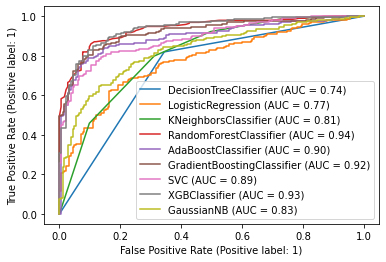

In [53]:
disp=plot_roc_curve(dtc,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_) # ax_ = axes with confusion matrix , use to combine one model to others
plot_roc_curve(knc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(abc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(xgb,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gnb,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

In [54]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [55]:
from sklearn.model_selection import GridSearchCV

parameters={'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
clf=GridSearchCV(svc,parameters)
clf.fit(x_train,y_train)
print('best parameters',clf.best_params_)

svc_new=clf.best_estimator_
svc_new.fit(x_train,y_train)
pred=svc_new.predict(x_test)
scr_=cross_val_score(svc_new,x_over,y_over,cv=10)
print('-------------------------- KNeighbors Classifier------------------')
print(f'\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%\n')
print(f'cross validation score:{scr_.mean()*100:.2f}%\n')
print(f'auc roc score:{roc_auc_score(y_test,pred)*100:.2f}%\n')
print(f'\nclassification report:\n\n{classification_report(y_test,pred)}\n')
print(f'confusioon matrix:\n\n{confusion_matrix(y_test,pred)}')

best parameters {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
-------------------------- KNeighbors Classifier------------------

accuracy score:84.62%

cross validation score:85.28%

auc roc score:84.57%


classification report:

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       183
           1       0.84      0.86      0.85       194

    accuracy                           0.85       377
   macro avg       0.85      0.85      0.85       377
weighted avg       0.85      0.85      0.85       377


confusioon matrix:

[[152  31]
 [ 27 167]]


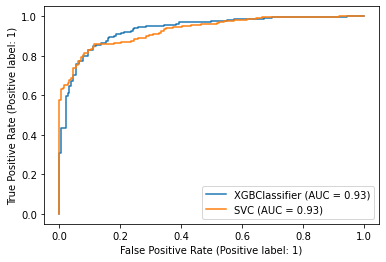

In [56]:
disp=plot_roc_curve(xgb,x_test,y_test)
plot_roc_curve(svc_new,x_test,y_test,ax=disp.ax_) # ax_ = axes with confusion matrix , use to combine one model to others
plt.legend(prop={'size':10},loc='lower right')
plt.show()

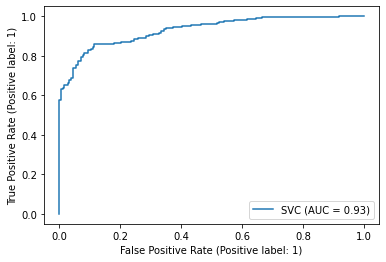

In [57]:
disp=plot_roc_curve(svc_new,x_test,y_test)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

In [58]:
import pickle
filename='insurance_claim_final.pkl'
pickle.dump(svc_new,open(filename,'wb'))